# Lab 1: Filtering operations

## Python packages
NumPy: Used functions related to linear algebra and matrix representation. <br>
SciPy: Used for convolution <br>
Matplotlib: Used for displaying images and graphs <br>
Functions: Used to access files related to the course <br>

In [19]:
import numpy as np
import matplotlib.pyplot as  plt
from numpy.fft import fft2, ifft2, fftshift
from scipy.signal import convolve2d
from Functions import *
from fftwave import fftwave

### Section 1.3

This block contains some of the pre-work files used to understand the functions.

Fhat


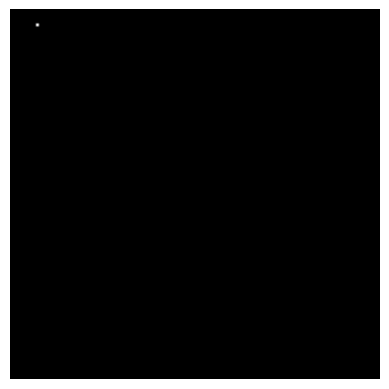

real part


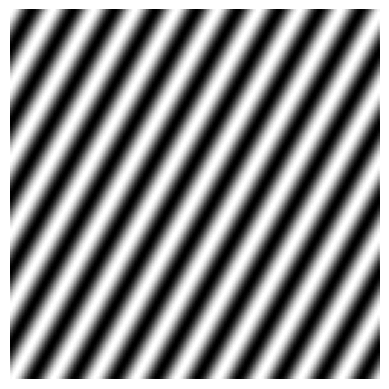

imaginary part


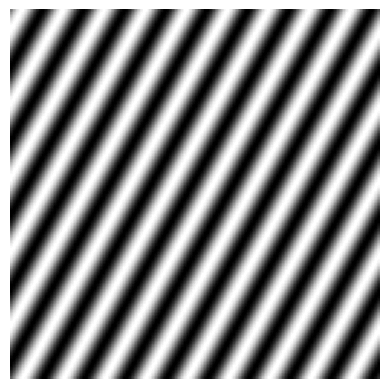

magnitude


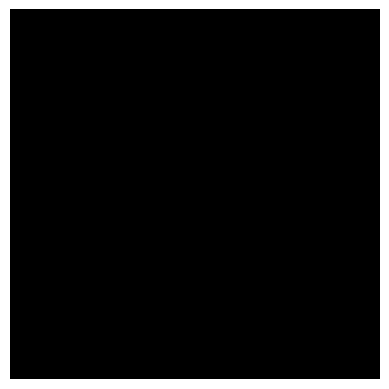

phase


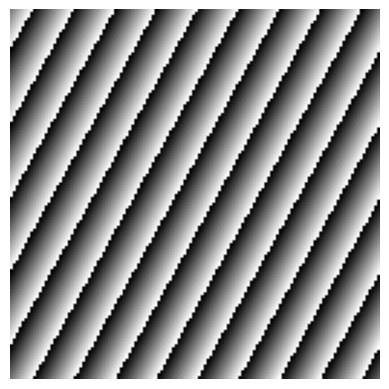

In [17]:
# this is used to set the values for p and q
p = 5
q = 9

# function is zero everywhere except point (p,q).                           
Fhat = np.zeros((128,128))
Fhat[p, q] = 1

# this is used to show the image
print("Fhat")
showgrey(Fhat, True)

# compute inverse discrete fourier transfom
F = ifft2(Fhat)

# to look at the real and imaginary parts as well as magnitude 
# and phase
Fabsmax = np.max(np.abs(F))
print("real part")
showgrey(np.real(F), True, 64, -Fabsmax, Fabsmax)
print("imaginary part")
showgrey(np.imag(F), True, 64, -Fabsmax, Fabsmax)
print("magnitude")
showgrey(np.abs(F), True, 64, -Fabsmax, Fabsmax)
print("phase")
showgrey(np.angle(F), True, 64, -np.pi, np.pi)

**Question 1** Repeat this exercise with the coordinates p and q set to (5, 9), (9, 5), (17, 9), (17, 121),
(5, 1) and (125, 1) respectively. What do you observe?

**Answer** <br>
As per my understanding, the points all correspond to the frequency component at a point in the image. The p value stands for the x-component of the frequency while the q value stands for the y-component of the frequncy.<br>
<br>
***Fhat***: shows where the frequency component lies on the frequency plane given that the top left corner denotes zero frequency <br>
***Centred Fhat***: shows where the frequency component lies on the frequency plane given that the centre denotes zero frequency <br>
***Real***: this corresponds to the cosine component of the fourier transform and denotes the magnitude of the signal at that point<br>
***Imaginary***: this corresponds to the sine component of the fourier transform and denotes the phase shift of the signal <br>
***Absolute***: this is overall amplitude of the fourier transform <br>
***Angle***: this is the overall wavelength of the fourier transform <br>
<br>
As the points move further away from the zero frequency component, it can be seen that the wavelength increases, hence showing that the frequency increases as the point moves further away from the origin.

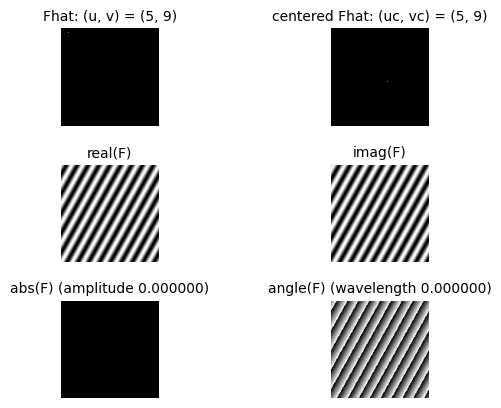

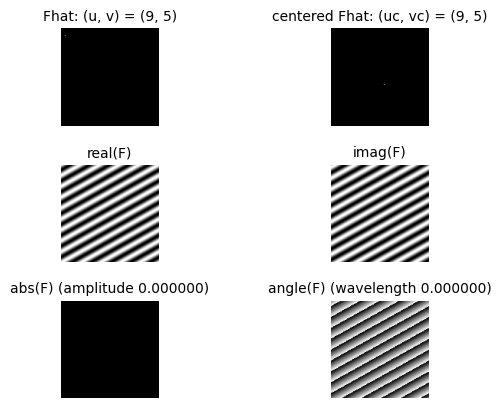

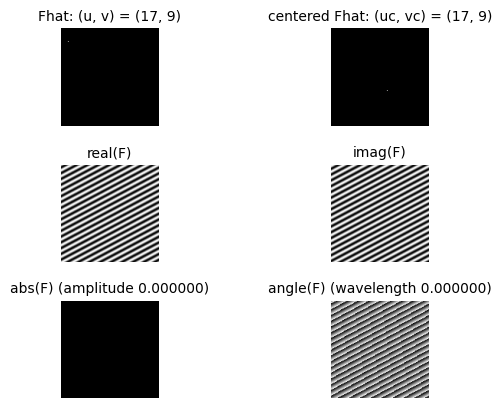

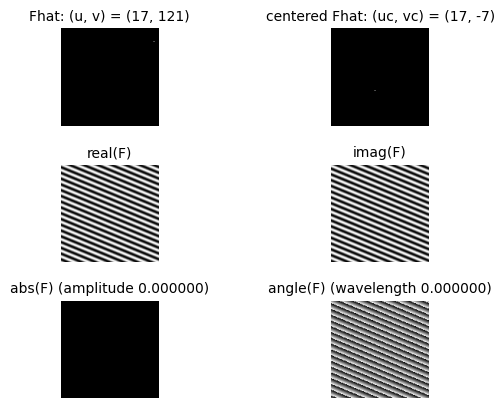

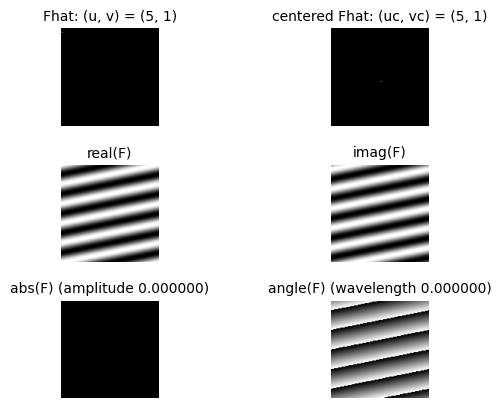

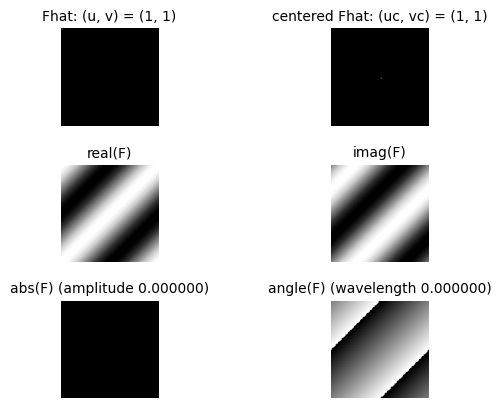

In [18]:
def question_1():
    p = [5,9,17,17,5,1]
    q = [9,5,9,121,1,1]

    for counter in range(6):
        fftwave(p[counter], q[counter])

question_1()

**Question 2** Explain how a position (p, q) in the Fourier domain will be projected as a sine wave in
the spatial domain. Illustrate with a figure.

**Answer** <br>
The position represents the frequency and orientation of the sinusoidal waves. The below equation represents the inverse Fourier transform in the discrete domain. <br>
$F(x) = \frac{1}{N}\sum_{u\in[0:N-1]^2} \hat(F) \exp(\frac{2(\pi)iu^Tx}{N}) $ <br> 
Applying the inverse Fourier transform at the point (p,q), we get,<br>
$F(x) = \frac{1}{N}\exp(\frac{2(\pi)i(p,q)^Tx}{N}) $ <br>
The below equation shows the Euler identity formula. <br>
$\exp(i\omega^Tx) = cos(\omega^Tx) + isin(\omega^Tx)$ <br>
By applying the Euler Identity to the inverse Fourier transform, we get, <br>
$F(x) = \frac{1}{N}cos(\frac{2\pi(p,q)^Tx}{N}) + i\frac{1}{N}sin(\frac{2\pi(p,q)^Tx}{N})$ <br> 

**Question 3**  How large is the amplitude? Write down the expression derived from Equation (4) in
these notes. Complement the code (variable amplitude) accordingly.

**Answer** <br>
The below equation represents the inverse Fourier transform in the discrete domain. <br>
$F(x) = \frac{1}{N}\sum_{u\in[0:N-1]^2} \hat(F) \exp(\frac{2(\pi)iu^Tx}{N}) $ <br> 
Applying the inverse Fourier transform at the point (p,q), we get,<br>
$F(x) = \frac{1}{N}\exp(\frac{2(\pi)i(p,q)^Tx}{N}) $ <br>
By applying the Euler Identity to the inverse Fourier transform, we get, <br>
$F(x) = \frac{1}{N}cos(\frac{2\pi(p,q)^Tx}{N}) + i\frac{1}{N}sin(\frac{2\pi(p,q)^Tx}{N})$ <br>
The amplitude of the inverse Fourier Transform is,
$|F(x)| = \frac{1}{N}$

**Question 4** How does the direction and length of the sine wave depend on p and q? Write down the
explicit expression that can be found in the lecture notes. Complement the code (variable wavelength)
accordingly.

**Answer** <br>
To find the phase of the sine wave (direction), we use, <br>
$\phi=tan^{-1}(\frac{Im[Fhat(u,v)]}{Re[Fhat(u,v)]})$<br>
The wavelength of the sine wave is given by, <br>
$\lambda = \frac{1}{\sqrt{u^2+v^2}}$

**Question 5** What happens when we pass the point in the center and either p or q exceeds half the
image size? Explain and illustrate graphically with a figure!

**Answer** <br>
As the function is periodic, when the zero frequency component is centred, if p>N/2, the p coordinate becomes p-N, and if q>N/2, the q coordinate becomes q-N.

**Question 6**  What is the purpose of the instructions following the question: What is done by
these instructions? in the code?

**Answer** <br>
These instructions provide the coordinates for the x and y frequency components after centering the zero-frequency component on the graph.

**Question 7** Why are these Fourier spectra concentrated to the borders of the images? Can you
give a mathematical interpretation? Hint: think of the frequencies in the source image and consider
the resulting image as a Fourier transform applied to a 2D function. It might be easier to analyze each
dimension separately!


### Section 1.4

This block contains some of the pre-work files used to understand the functions.

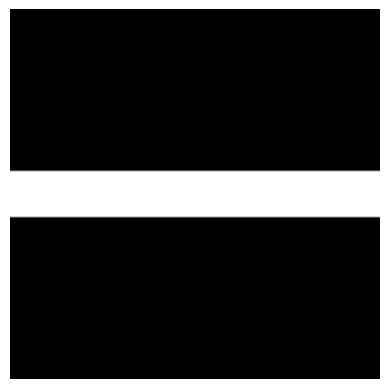

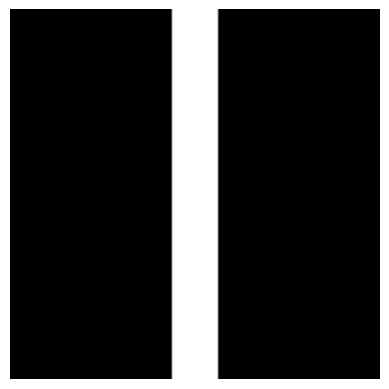

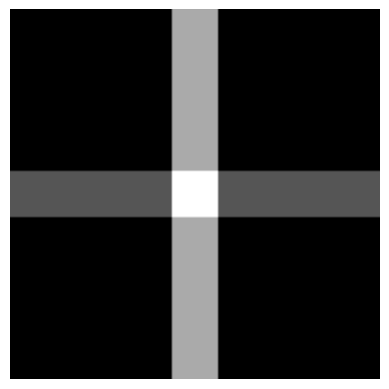

In [20]:
F = np.concatenate([np.zeros((56,128)), np.ones((16,128)), np.zeros((56,128))])
G = F.T
H = F + 2*G

showgrey(F,True)
showgrey(G, True)
showgrey(H,True)

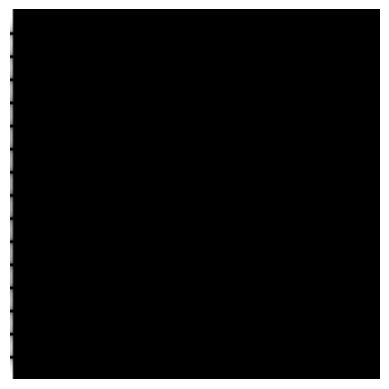

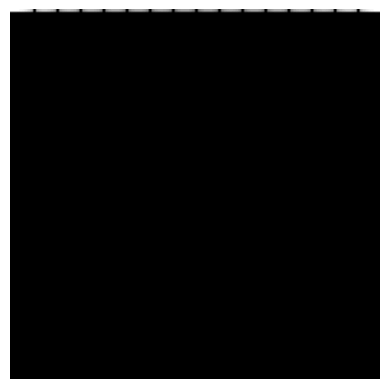

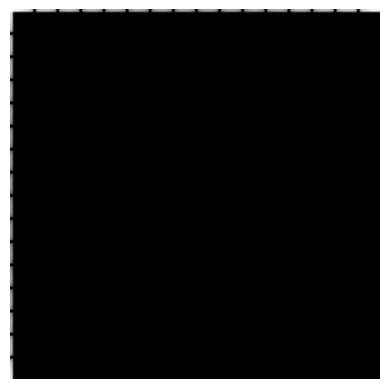

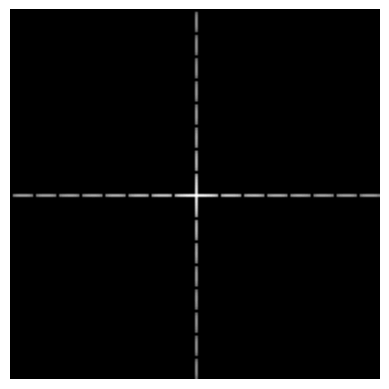

In [21]:
Fhat = fft2(F)
Ghat = fft2(G)
Hhat = fft2(H)

showgrey(np.log(1 + np.abs(Fhat)))
showgrey(np.log(1 + np.abs(Ghat)))
showgrey(np.log(1 + np.abs(Hhat)))

showgrey(np.log(1 + np.abs(fftshift(Hhat))))

**Question 7** <br>
Why are these Fourier spectra concentrated to the borders of the images? Can you
give a mathematical interpretation? Hint: think of the frequencies in the source image and consider
the resulting image as a Fourier transform applied to a 2D function. It might be easier to analyze each
dimension separately!